In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\\Users\\lenovo\\Downloads\\Churn_Modelling.csv")
df.head(3)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
df.shape

(10000, 14)

chk null 

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

chk for duplicate rows

In [10]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [17]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [18]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df.drop(columns=['RowNumber' , 'CustomerId' , 'Surname'], inplace=True)

In [15]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


Encoding

In [ ]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
X = df.drop(columns=["Exited"])
y = df['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)   #a single column is represented as a 1-dimensional array, so its shape is written as (8000,), not (8000,1).
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


Scaling


In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]], shape=(8000, 11))

use Seq model and add layers(hidden and output)

In [ ]:
# model = Sequential()

# model.add(Dense(3, activation='sigmoid' , input_dim = 11))  #input to hidden layer
# model.add(Dense(1 , activation='sigmoid'))  #hidden to output layer

# # You have 1 hidden layer with 3 neurons.
# # Each neuron connects to all 11 input features → 33 weights + 3 biases → 36 parameters in total. from input to hidden
# # and from hidden to output 4 params(3 weights + 1 bias)
# # Each neuron outputs a value between 0 and 1 using the sigmoid activation function.

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


use RELU for improve acc and increase one layer and also increase the num of neurons in hidden layer


In [61]:
model = Sequential()

model.add(Dense(11, activation='relu' , input_dim = 11))  #input to hidden layer1
model.add(Dense(11, activation='relu' ))  #hidden layer1 to hidden layer2
model.add(Dense(1 , activation='relu'))  #hidden layer2 to output layer

Summary

In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [ ]:
# model.compile(loss='binary_crossentropy' , optimizer='Adam' )

In [63]:
model.compile(loss='binary_crossentropy' , optimizer='Adam' , metrics=['accuracy'])

Train the nn

In [71]:
history = model.fit(X_train_scaled , y_train , epochs=100 , validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8612 - loss: 0.3422 - val_accuracy: 0.8581 - val_loss: 0.3899
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8614 - loss: 0.3391 - val_accuracy: 0.8619 - val_loss: 0.4152
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8616 - loss: 0.3373 - val_accuracy: 0.8587 - val_loss: 0.3892
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8622 - loss: 0.3377 - val_accuracy: 0.8612 - val_loss: 0.4002
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8598 - loss: 0.3372 - val_accuracy: 0.8569 - val_loss: 0.3895
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8616 - loss: 0.3381 - val_accuracy: 0.8569 - val_loss: 0.3860
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8600 - loss: 0.3360 - val_accuracy: 0.8562 - val_loss: 0.3906
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8492 - loss: 0.4364 - val_accu

weights and bias of 1st layers

In [65]:
model.layers[0].get_weights()   # these are 33 weights of input to hidden layer and also 3 bias

[array([[ 0.06633966,  0.07963976, -0.3807848 ,  0.2942522 , -0.1852773 ,
         -0.13296619,  0.20145819,  0.16960324,  0.35770145, -0.3544214 ,
         -0.07002576],
        [ 0.29903603,  0.54341865,  0.22431679,  0.21304442,  0.3976499 ,
         -0.46726894,  0.1540776 , -0.11498342, -0.19517781, -0.5536823 ,
          0.72617334],
        [-0.03611788,  0.00538142, -0.34961978, -0.01511388, -0.2686617 ,
         -0.05382684,  0.00403504, -0.25754845,  0.38035265,  0.21566093,
         -0.01699029],
        [ 0.24169227, -0.18567413,  0.35334584,  0.10007502,  0.24499649,
          0.21494773, -0.21770765, -0.06848188, -0.08736014,  0.36318907,
          0.1374923 ],
        [ 0.72180057, -0.61942   ,  0.23425093, -0.2354039 , -0.2919989 ,
          0.05361247, -0.29579613, -0.34703666,  0.18615127,  0.11197547,
          0.34317848],
        [ 0.05418956, -0.02919329, -0.08178723,  0.10511226,  0.02584567,
         -0.42781782,  0.39722496,  0.30055603, -0.02459294,  0.1038417

In [66]:
model.layers[1].get_weights()      # these are 3 weights of hidden to output layer and also 1 bias

[array([[ 0.14541785,  0.00919741,  0.0041204 ,  0.33701938,  0.07594328,
          0.25429672,  0.5978443 ,  0.40159315, -0.14750187,  0.23128828,
          0.18855903],
        [-0.25391555,  0.08012797,  0.44902223, -0.42660218, -0.3111097 ,
          0.20370533, -0.24294968, -0.14798295,  0.47153154,  0.353957  ,
         -0.3289324 ],
        [-0.16972636, -0.22514574, -0.25177413, -0.37080228, -0.01707405,
          0.40261313,  0.2822474 ,  0.36452186,  0.0565301 ,  0.08901845,
          0.35407013],
        [-0.26426536,  0.1004609 , -0.1589237 ,  0.16510649, -0.3572017 ,
         -0.17720403, -0.03625711, -0.4690456 , -0.43723536,  0.18234794,
         -0.23763208],
        [-0.23065071,  0.26272297,  0.29479033, -0.35855398,  0.16314988,
          0.42207736, -0.69128007,  0.36696902, -0.20814805, -0.15674587,
         -0.22907747],
        [ 0.48293254, -0.2771918 , -0.20183897, -0.28252494, -0.16613914,
         -0.12505007, -0.15450722,  0.4413764 , -0.07903897, -0.1191822

predict


In [67]:
model.layers[2].get_weights()      

[array([[ 0.3165639 ],
        [-0.63398683],
        [ 0.48781174],
        [ 0.29158157],
        [-0.18572499],
        [ 0.28076202],
        [ 0.5941914 ],
        [-0.08798461],
        [ 0.21181196],
        [ 0.34723032],
        [-0.2015986 ]], dtype=float32),
 array([0.01314429], dtype=float32)]

In [68]:
y_log = model.predict(X_test_scaled)  # here we cam see its output is not 0 or 1 bcz we use sigmoid here which outputs in between 0 and 1 probability
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.11505786],
       [0.04380212],
       [0.15857929],
       ...,
       [0.6421301 ],
       [0.19684032],
       [0.3687469 ]], shape=(2000, 1), dtype=float32)

Convert into 0 and 1

In [69]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], shape=(2000, 1))

Accuracy chk

In [70]:
accuracy_score(y_test , y_pred)

0.856

plot the graphs of training loss and validation loss

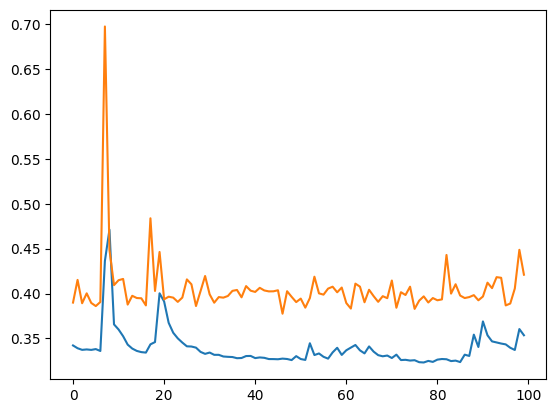

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plot the graphs of training accuracy and validation accuracy

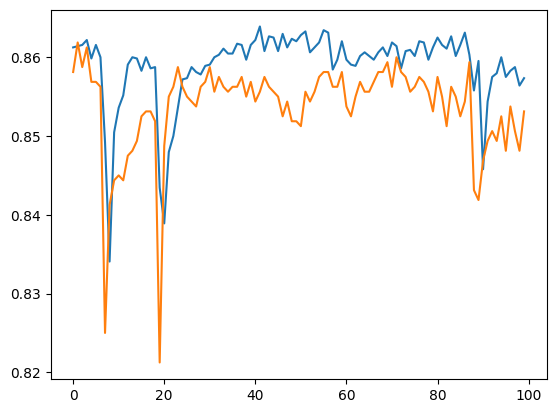

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()